# 学生练习答案：Python数据可视化实战（详细注释版）

**学习目标：**

1. 掌握使用 Matplotlib 和 Seaborn 绘制多种常用统计图表。
2. 学会为探索性数据分析、模型评估等不同目的选择并创建合适的可视化图形。
3. 练习编写可复用的绘图函数，提升代码效率。

---

## 准备工作：载入所需 Package 与数据

**要求：** 
1. 导入所有必需的库。
2. 读取 `data.xlsx` 文件到名为 `picu_data` 的DataFrame中，并显示其头部信息。

In [13]:
# 导入pandas库：用于数据处理和分析，提供DataFrame数据结构
# 使用方法：pd.read_excel()读取Excel文件，pd.DataFrame()创建数据框
import pandas as pd

# 导入numpy库：用于科学计算，提供多维数组和数学函数
# 使用方法：np.array()创建数组，np.median()计算中位数等
import numpy as np

# 导入matplotlib.pyplot库：用于绘制基础图表，是Python最常用的绘图库
# 使用方法：plt.figure()创建画布，plt.plot()绘制线图，plt.title()设置标题等
import matplotlib.pyplot as plt

# 导入seaborn库：基于matplotlib的高级统计绘图库，提供更美观的默认样式
# 使用方法：sns.histplot()绘制直方图，sns.boxplot()绘制箱线图，sns.heatmap()绘制热力图等
import seaborn as sns

# 导入Counter类：用于计数统计，可以快速统计元素出现的次数
# 使用方法：Counter(list)返回一个字典，包含每个元素的计数
from collections import Counter


# 导入机器学习相关模块，为后续绘图准备

# 导入train_test_split：用于将数据集分割为训练集和测试集
# 使用方法：train_test_split(X, y, test_size=0.3, random_state=42)
# 参数说明：X为特征数据，y为目标数据，test_size为测试集比例，random_state为随机种子
from sklearn.model_selection import train_test_split

# 导入LogisticRegression：逻辑回归分类器，用于二分类问题
# 使用方法：LogisticRegression(max_iter=100).fit(X_train, y_train)
# 参数说明：max_iter为最大迭代次数，fit()方法用于训练模型
from sklearn.linear_model import LogisticRegression

# 导入SimpleImputer：用于处理缺失值，可以用均值、中位数、众数等填充
# 使用方法：SimpleImputer(strategy='mean').fit_transform(data)
# 参数说明：strategy可选'mean'（均值）、'median'（中位数）、'most_frequent'（众数）、'constant'（常数）
from sklearn.impute import SimpleImputer

# 导入StandardScaler：用于数据标准化，将数据转换为均值为0、标准差为1的分布
# 使用方法：StandardScaler().fit_transform(data)
# 作用：消除不同特征之间的量纲差异，提高模型性能
from sklearn.preprocessing import StandardScaler

# 导入模型评估指标：
# confusion_matrix：混淆矩阵，用于评估分类模型的性能
# 使用方法：confusion_matrix(y_true, y_pred)
# roc_auc_score：ROC曲线下面积，用于评估二分类模型的综合性能
# 使用方法：roc_auc_score(y_true, y_pred_prob)
# roc_curve：计算ROC曲线的假阳性率和真阳性率
# 使用方法：fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

# 导入KMeans：K均值聚类算法，用于无监督学习
# 使用方法：KMeans(n_clusters=3, random_state=42).fit(data)
# 参数说明：n_clusters为聚类数量，random_state为随机种子
from sklearn.cluster import KMeans

# 导入joblib库：用于模型的保存和加载
# 使用方法：joblib.dump(model, 'model_filename.joblib')保存模型
import joblib


# 导入warnings库：用于控制警告信息的显示
# 使用方法：warnings.filterwarnings("ignore")忽略所有警告
import warnings
# 忽略警告信息，避免输出干扰
warnings.filterwarnings("ignore")


# 设置matplotlib的中文字体参数，确保图表标题和标签能正确显示中文
# plt.rcParams是matplotlib的全局配置字典
# font.sans-serif设置无衬线字体，'SimHei'是黑体，支持中文显示
plt.rcParams["font.sans-serif"] = 'SimHei'
# axes.unicode_minus设置为False，确保负号能正常显示
# 解决中文显示时负号显示为方块的问题
plt.rcParams["axes.unicode_minus"] = False


# 读取Excel数据文件
# path变量存储数据文件路径，便于后续修改和维护
path = 'data.xlsx'
# 使用pandas的read_excel函数读取Excel文件
# 返回一个DataFrame对象，是pandas的核心数据结构，类似于表格
picu_data = pd.read_excel(path)
# 显示DataFrame的前5行数据，用于快速了解数据结构和内容
# head()方法默认显示前5行，可以传入参数指定行数，如head(10)
picu_data.head()

,age_month,lab_5237_min,lab_5227_min,lab_5225_range,lab_5235_max,lab_5257_min,HOSPITAL_EXPIRE_FLAG
0,4,NaN,NaN,NaN,NaN,NaN,0
1,86,NaN,NaN,NaN,NaN,NaN,1
2,34,NaN,NaN,NaN,NaN,NaN,0
3,94,NaN,NaN,NaN,NaN,NaN,1
4,11,NaN,NaN,NaN,NaN,NaN,1


---

## 任务一：探索性数据分析 (EDA) 可视化

---

### 1.1 直方图：观察年龄分布

**要求：**
1. 使用 `seaborn` 的 `histplot` 函数为 `age_month` 列绘制直方图。
2. 设置 `kde=True` 来同时显示核密度估计曲线。
3. 使用 `plt.title()` 添加图表标题 "年龄分布直方图"。

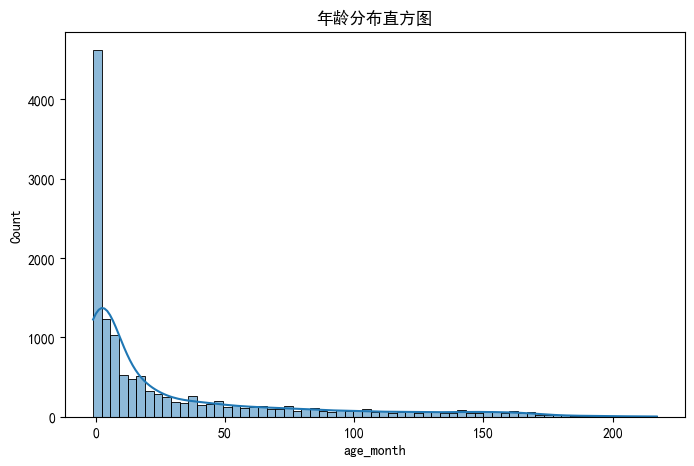

In [14]:
# 创建一个新的图形窗口，设置图形大小为8英寸宽、5英寸高
# figsize参数以英寸为单位，(宽, 高)格式
# 使用方法：plt.figure(figsize=(width, height))
# 作用：控制图表的显示尺寸，避免文字重叠或显示不清
plt.figure(figsize=(8, 5))

# 使用seaborn的histplot函数绘制直方图
# 参数说明：
# data=picu_data：指定数据源为picu_data DataFrame
# x='age_month'：指定要绘制直方图的列，这里是年龄（月）
# kde=True：显示核密度估计曲线，平滑地展示数据分布趋势
# 使用方法：sns.histplot(data=DataFrame, x='列名', kde=bool)
# 作用：观察数据的分布形态，识别偏态、峰态等特征
sns.histplot(data=picu_data, x='age_month', kde=True)

# 设置图表标题
# plt.title()用于设置图表的主标题
# 使用方法：plt.title('标题文字')
# 作用：让读者快速理解图表展示的内容
plt.title("年龄分布直方图")

# 显示图形
# plt.show()将图形渲染并显示出来
# 在Jupyter notebook中，这一行会直接在输出单元格显示图形
plt.show()

# 图表解释：
# 这个直方图展示了PICU患者年龄分布情况
# X轴表示年龄（以月为单位），Y轴表示患者数量
# 柱状图显示不同年龄段的患者频数，曲线显示整体分布趋势
# 通过这个图可以了解患者群体的年龄特征，如是否存在年龄集中趋势

### 1.2 箱线图：比较不同结局下各指标的分布

**要求：**
1. 创建一个包含所有 `lab_` 列名的列表 `colname`。
2. 使用 `plt.subplots` 创建一个 3x2 的子图网格 `axs`。
3. 编写一个 `for` 循环，遍历 `colname` 列表。
4. 在循环中，使用 `seaborn` 的 `boxplot` 函数，在对应的子图 `ax` 上绘制按 `HOSPITAL_EXPIRE_FLAG` 分组的箱线图。
5. 使用 `plt.suptitle()` 为整个图表添加总标题 "不同结局下各实验室指标分布"。

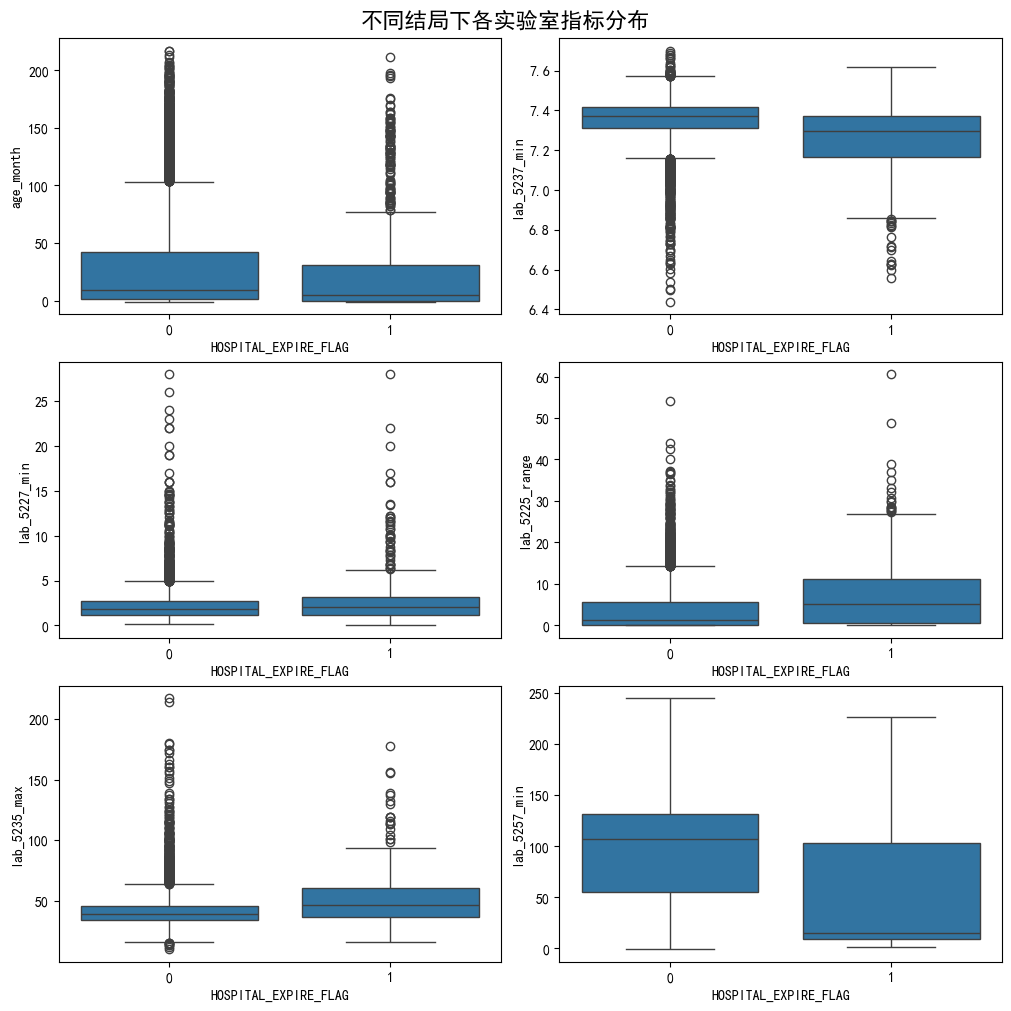

In [15]:
# 创建包含要分析的列名的列表
# 这些列包括年龄和各项实验室检查指标
# colname列表用于后续循环绘图，提高代码复用性
colname = ['age_month', 'lab_5237_min', 'lab_5227_min', 'lab_5225_range', 'lab_5235_max', 'lab_5257_min']


# 创建子图网格
# 使用plt.subplots()创建多个子图，便于在一个图形中显示多个图表
# 参数说明：
# 3, 2：创建3行2列的子图网格，共6个子图
# constrained_layout=True：自动调整子图间距，避免标题和标签重叠
# figsize=(10, 10)：设置整个图形的大小为10英寸宽、10英寸高
# 返回值：fig为整个图形对象，axs为子图数组（3行2列的numpy数组）
# 使用方法：fig, axs = plt.subplots(行数, 列数, constrained_layout=bool, figsize=(宽, 高))
fig, axs = plt.subplots(3, 2, constrained_layout=True, figsize=(10, 10))


# 使用for循环遍历colname列表中的每个列名
# range(len(colname))生成0到5的整数，对应6个要绘制的指标
# 循环的目的是为每个指标创建一个箱线图
for i in range(len(colname)):
    # 在循环中绘制每个子图
    # 使用seaborn的boxplot函数绘制箱线图
    # 参数说明：
    # data=picu_data：指定数据源
    # x='HOSPITAL_EXPIRE_FLAG'：X轴为医院死亡标志（0=存活，1=死亡）
    # y=colname[i]：Y轴为当前循环的指标名称
    # ax=axs[i//2, i%2]：指定绘制的子图位置
    #   i//2：整数除法，计算行索引（0,0,1,1,2,2）
    #   i%2：取余运算，计算列索引（0,1,0,1,0,1）
    # 使用方法：sns.boxplot(data=DataFrame, x='分组列', y='数值列', ax=子图对象)
    sns.boxplot(data=picu_data, x='HOSPITAL_EXPIRE_FLAG', y=colname[i], ax=axs[i//2, i%2])


# 为整个图形添加总标题
# plt.suptitle()为多个子图组成的图形添加主标题
# fontsize=16：设置标题字体大小为16磅
# 使用方法：plt.suptitle('标题文字', fontsize=大小)
plt.suptitle("不同结局下各实验室指标分布", fontsize=16)

# 显示图形
plt.show()

# 图表解释：
# 这组箱线图比较了存活患者（0）和死亡患者（1）在6个指标上的分布差异
# 每个箱线图包含以下统计信息：
# - 箱体：25%分位数到75%分位数（中间50%的数据）
# - 箱内横线：中位数（50%分位数）
# - 须线：延伸到1.5倍四分位距内的最远点
# - 圆点：超出须线的异常值
# 通过比较两组的箱线图，可以识别哪些指标在死亡和存活患者间存在显著差异
# 这有助于发现潜在的预后预测因子

---

## 任务二：模型评估可视化

---

### 2.1 混淆矩阵热力图

**背景**：为了绘制模型评估图，我们首先需要准备数据并训练一个模型作为示例。以下代码已为你准备好数据和训练好的逻辑回归模型 `lr_model`。

**要求：**
1.  理解下面提供的 `confusion_matrix_plot` 函数的逻辑。
2.  调用该函数，传入测试集数据 (`X_test`, `y_test`) 和训练好的 `lr_model`，生成并显示混淆矩阵图。

模型已保存到: picu_lr_model.joblib


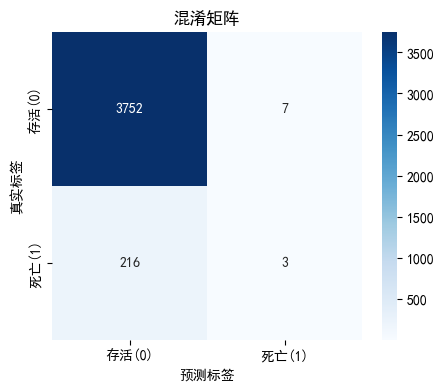

In [16]:
# --- 数据准备 (已提供) ---

# 使用中位数填充缺失值
# picu_data.median()计算每列的中位数，fillna()用这些中位数填充对应列的缺失值
# 这样处理可以避免缺失值对模型训练的影响
# 使用方法：DataFrame.fillna(value) 
picu_data_with_median = picu_data.fillna(picu_data.median())

# 提取特征数据X：所有列除了最后一列
# iloc[:, 0:-1]表示选择所有行，从第0列到倒数第2列
# X是模型的输入特征，用于预测患者结局
X = picu_data_with_median.iloc[:, 0:-1]

# 提取目标数据y：最后一列
# iloc[:, -1]表示选择所有行的最后一列
# y是模型要预测的目标变量（医院死亡标志）
y = picu_data_with_median.iloc[:, -1]

# 将数据分割为训练集和测试集
# test_size=0.3：30%的数据作为测试集，70%作为训练集
# random_state=0：设置随机种子，确保每次运行结果一致，便于复现
# stratify参数未设置，可能存在类别不平衡问题
# 使用方法：X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=比例, random_state=种子)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


# --- 模型训练 (已提供) ---

# 创建并训练逻辑回归模型
# LogisticRegression(max_iter=100)：创建逻辑回归分类器，最大迭代次数为100
# .fit(X_train, y_train)：使用训练数据训练模型
# 逻辑回归是一种常用的二分类算法，适用于预测患者死亡风险
lr_model = LogisticRegression(max_iter=100).fit(X_train, y_train)

# 预测测试集的概率值
# predict_proba()返回每个样本属于各个类别的概率
# [:, 1]选择属于正类（死亡）的概率
# y_pred_prob将用于ROC曲线和混淆矩阵的计算
y_pred_prob = lr_model.predict_proba(X_test)[:, 1]

model_filename = 'picu_lr_model.joblib'

joblib.dump(lr_model, model_filename)

print(f"模型已保存到: {model_filename}")

# --- 绘图函数 (已提供) ---

def confusion_matrix_plot(y_true, y_pred_prob, threshold=0.5, title='混淆矩阵'):
    """
    绘制混淆矩阵热力图的函数
    
    参数说明：
    y_true：真实标签数组
    y_pred_prob：模型预测的正类概率数组
    threshold：分类阈值，默认0.5
    title：图表标题
    
    使用方法：
    confusion_matrix_plot(y_test, y_pred_prob, threshold=0.5)
    """
    # 将概率转换为二分类预测
    # (y_pred_prob > threshold)返回布尔数组，True表示概率大于阈值
    # .astype(int)将布尔值转换为整数（True=1, False=0）
    # 这样就得到了二分类的预测结果
    y_pred = (y_pred_prob > threshold).astype(int)
    
    # 计算混淆矩阵
    # confusion_matrix返回一个2x2矩阵：
    # [[TN, FP],
    #  [FN, TP]]
    # TN：真阴性（正确预测为存活），FP：假阳性（错误预测为死亡）
    # FN：假阴性（错误预测为存活），TP：真阳性（正确预测为死亡）
    cm = confusion_matrix(y_true, y_pred)
    
    # 创建图形和坐标轴
    # figsize=(5, 4)：设置图形大小
    # fig是整个图形对象，ax是子图对象
    fig, ax = plt.subplots(figsize=(5, 4))
    
    # 绘制热力图
    # sns.heatmap()将矩阵以颜色深浅的形式可视化
    # 参数说明：
    # cm：混淆矩阵数据
    # annot=True：在单元格中显示数值
    # fmt='d'：数值格式为整数
    # cmap='Blues'：使用蓝色系颜色映射
    # ax=ax：指定在哪个子图上绘制
    # 使用方法：sns.heatmap(矩阵, annot=bool, fmt=格式, cmap=颜色, ax=子图)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    
    # 设置X轴标签
    # ax.set_xlabel()设置X轴的标签文字
    ax.set_xlabel('预测标签')
    
    # 设置Y轴标签
    # ax.set_ylabel()设置Y轴的标签文字
    ax.set_ylabel('真实标签')
    
    # 设置图表标题
    ax.set_title(title)
    
    # 设置X轴刻度标签
    # ax.xaxis.set_ticklabels()设置X轴刻度的文字标签
    # 分别对应预测的存活(0)和死亡(1)
    ax.xaxis.set_ticklabels(['存活(0)', '死亡(1)'])
    # 设置Y轴刻度标签
    # 分别对应真实的存活(0)和死亡(1)
    ax.yaxis.set_ticklabels(['存活(0)', '死亡(1)'])
    
    # 显示图形
    plt.show()


# **你的任务**: 调用上面的函数，传入正确的参数来绘制混淆矩阵
# 调用混淆矩阵绘制函数
# y_true=y_test：传入测试集的真实标签
# y_pred_prob=y_pred_prob：传入模型预测的死亡概率
# threshold=0.5：使用默认的0.5作为分类阈值
# 这将生成一个2x2的混淆矩阵热力图
confusion_matrix_plot(y_true=y_test, y_pred_prob=y_pred_prob, threshold=0.5)

# 图表解释：
# 混淆矩阵热力图展示了分类模型的预测性能
# 左上角(TN)：真实存活且预测为存活的患者数量
# 右上角(FP)：真实存活但预测为死亡的患者数量（假警报）
# 左下角(FN)：真实死亡但预测为存活的患者数量（漏诊）
# 右下角(TP)：真实死亡且预测为死亡的患者数量
# 颜色深浅表示数值大小，便于快速识别主要预测结果
# 通过混淆矩阵可以计算准确率、灵敏度、特异度等评估指标

### 2.2 ROC 曲线

**要求：**
1.  使用 `roc_curve` 函数，根据测试集的真实标签 `y_test` 和模型预测的概率 `y_pred_prob`，计算出 `fpr` (假阳性率) 和 `tpr` (真阳性率)。
2.  使用 `roc_auc_score` 函数计算 AUC 值。
3.  使用 `plt.plot` 绘制 ROC 曲线（x轴为fpr, y轴为tpr）。
4.  绘制一条从 (0,0) 到 (1,1) 的虚线作为参考。
5.  在图表标题中显示计算出的 AUC 值。

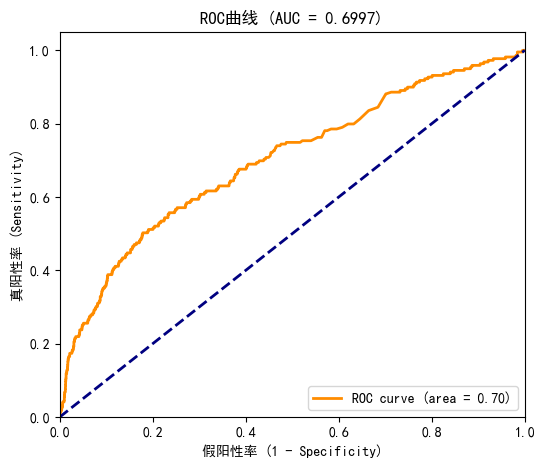

In [17]:
# 1. 计算假阳性率和真阳性率
# roc_curve函数计算不同阈值下的ROC曲线坐标点
# 参数说明：
# y_test：真实标签
# y_pred_prob：预测的正类概率
# 返回值：
# fpr：假阳性率（1-特异度），X轴坐标
# tpr：真阳性率（灵敏度），Y轴坐标
# _：阈值数组（这里用下划线表示不使用）
# 使用方法：fpr, tpr, thresholds = roc_curve(y_true, y_scores)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)


# 2. 计算 AUC 值
# roc_auc_score计算ROC曲线下面积
# AUC值范围：0.5-1.0，越大表示模型性能越好
# 0.5：随机猜测，1.0：完美分类
# 使用方法：auc = roc_auc_score(y_true, y_scores)
roc_auc = roc_auc_score(y_test, y_pred_prob)


# 创建图形窗口，设置大小
plt.figure(figsize=(6, 5))

# 3. 绘制 ROC 曲线
# plt.plot()绘制线图
# 参数说明：
# fpr, tpr：X轴和Y轴数据
# color='darkorange'：线条颜色为深橙色
# lw=2：线条宽度为2磅
# label=f'ROC curve (area = {roc_auc:.2f})'：图例标签，显示AUC值保留2位小数
# 使用方法：plt.plot(x, y, color=颜色, lw=宽度, label=标签)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')


# 4. 绘制参考线
# 从(0,0)到(1,1)的对角线，表示随机分类器的性能
# color='navy'：海军蓝色
# lw=2：线条宽度
# linestyle='--'：虚线样式
# 这条线作为基准，ROC曲线越远离这条线（越靠近左上角）表示模型性能越好
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')


# 设置X轴范围
# plt.xlim()设置X轴的显示范围
plt.xlim([0.0, 1.0])

# 设置Y轴范围
# plt.ylim()设置Y轴的显示范围，1.05留出一些空间给图例
plt.ylim([0.0, 1.05])

# 设置X轴标签
# 假阳性率 = 1 - 特异度
plt.xlabel('假阳性率 (1 - Specificity)')

# 设置Y轴标签
# 真阳性率 = 灵敏度
plt.ylabel('真阳性率 (Sensitivity)')

# 5. 设置标题
# f-string格式化，显示AUC值保留4位小数
plt.title(f'ROC曲线 (AUC = {roc_auc:.4f})')

# 显示图例
# plt.legend()显示图表的图例
# loc="lower right"：将图例放在右下角
plt.legend(loc="lower right")

# 显示图形
plt.show()

# 图表解释：
# ROC曲线是评估二分类模型性能的重要工具
# X轴：假阳性率（误报率），Y轴：真阳性率（命中率）
# 橙色曲线：模型在不同阈值下的性能表现
# 蓝色虚线：随机分类器的基准线
# AUC值：ROC曲线下面积，综合评估模型性能
#   - 0.9-1.0：优秀
#   - 0.8-0.9：良好
#   - 0.7-0.8：一般
#   - 0.6-0.7：较差
#   - 0.5-0.6：失败
# 曲线越靠近左上角，说明模型在保持高灵敏度的同时能控制假阳性率

---

## 任务三：无监督学习可视化

---

### 3.1 肘部法则图

**背景**：同样，我们需要先对数据进行预处理。以下代码已为你准备好用于聚类的标准化数据 `data_clustering_scaled`。

**要求：**
1. 创建一个空列表 `wcss`。
2. 编写一个 `for` 循环，让 K 从 1 遍历到 10。
3. 在循环中，创建并拟合一个 `KMeans` 模型，然后将其 `inertia_` 属性（即WCSS）添加到 `wcss` 列表中。
4. 循环结束后，使用 `plt.plot` 绘制 K 值 (`range(1, 11)`) 与 `wcss` 列表的关系图，以找到"肘部"。

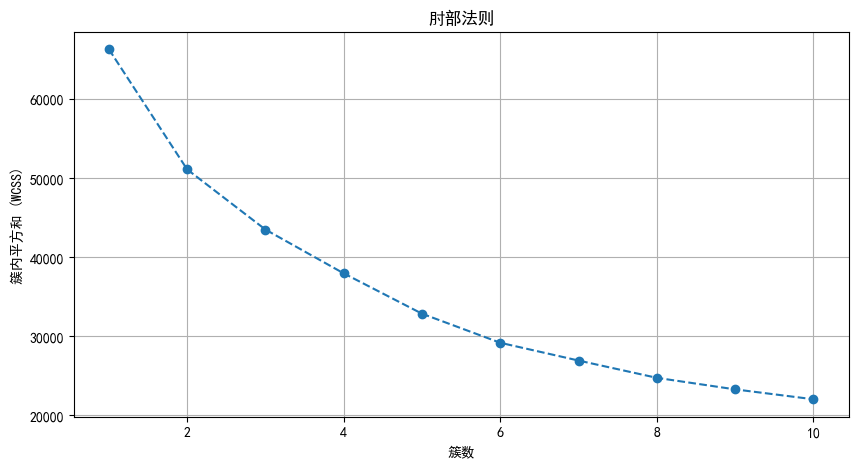

In [18]:
# --- 数据准备 (已提供) ---

# 选择用于聚类的特征列
# 这些是实验室检查指标，用于患者聚类分析
features = ['lab_5237_min', 'lab_5227_min', 'lab_5225_range', 'lab_5235_max', 'lab_5257_min']

# 从原始数据中提取选定的特征
# data_clustering是用于聚类的数据子集
data_clustering = picu_data[features]

# 创建缺失值填充器
# SimpleImputer用于处理数据中的缺失值
# strategy='mean'：使用均值填充缺失值
# 其他选项：'median'（中位数）、'most_frequent'（众数）、'constant'（常数）
imputer = SimpleImputer(strategy='mean')

# 填充缺失值并转换为DataFrame
# fit_transform()先计算填充值，然后应用填充
# pd.DataFrame()将numpy数组转换回DataFrame，保持列名
data_clustering_imputed = pd.DataFrame(imputer.fit_transform(data_clustering), columns=features)

# 创建标准化器
# StandardScaler将数据标准化为均值为0、标准差为1的分布
# 标准化是聚类分析的重要预处理步骤，消除量纲影响
scaler = StandardScaler()

# 对数据进行标准化处理
# fit_transform()先计算均值和标准差，然后应用标准化
# data_clustering_scaled是标准化后的数据，适合用于K均值聚类
data_clustering_scaled = scaler.fit_transform(data_clustering_imputed)


# **你的任务**: 完成下面的循环和绘图代码

# 创建空列表用于存储不同K值的WCSS值
# WCSS (Within-Cluster Sum of Squares)：簇内平方和
# 衡量聚类效果的指标，值越小表示聚类效果越好
wcss = []

# 循环测试不同的聚类数量K（从1到10）
# range(1, 11)生成1到10的整数，代表不同的聚类数量
for i in range(1, 11):
    # 创建K均值聚类模型
    # n_clusters=i：设置当前测试的聚类数量
    # init='k-means++'：使用k-means++算法初始化聚类中心，比随机初始化更好
    # random_state=42：设置随机种子，确保结果可重现
    # 使用方法：KMeans(n_clusters=数量, init='k-means++', random_state=种子)
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    
    # 训练聚类模型
    # fit()方法执行K均值聚类算法
    # 算法步骤：
    # 1. 随机选择K个初始聚类中心
    # 2. 将每个样本分配到最近的聚类中心
    # 3. 重新计算每个聚类的中心
    # 4. 重复步骤2-3直到收敛
    kmeans.fit(data_clustering_scaled)
    
    # 将当前K值的WCSS添加到列表中
    # inertia_属性存储了聚类结果的WCSS值
    # WCSS = 所有样本到其所属聚类中心的距离平方和
    # 这个值会随着K的增加而减小，但减小的幅度会逐渐变小
    wcss.append(kmeans.inertia_)


# 绘制肘部法则图
# 创建图形窗口
plt.figure(figsize=(10, 5))

# 绘制K值与WCSS的关系线图
# range(1, 11)：X轴数据，K值从1到10
# wcss：Y轴数据，对应的WCSS值
# marker='o'：在每个数据点添加圆形标记
# linestyle='--'：使用虚线连接数据点
# 使用方法：plt.plot(x, y, marker=标记样式, linestyle=线样式)
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')

# 设置图表标题
plt.title('肘部法则')

# 设置X轴标签
# K值表示聚类的数量
plt.xlabel('簇数')

# 设置Y轴标签
# WCSS衡量聚类内部的一致性
plt.ylabel('簇内平方和 (WCSS)')

# 添加网格线
# plt.grid(True)显示背景网格，便于读取数值
plt.grid(True)

# 显示图形
plt.show()

# 图表解释：
# 肘部法则图用于确定最佳的聚类数量K
# X轴：聚类数量K，Y轴：簇内平方和WCSS
# 图形特点：
# - K=1时WCSS最大（所有样本在一个簇中）
# - 随着K增加，WCSS逐渐减小
# - 减小的幅度逐渐变小，形成类似手肘的形状
# 肘部位置（WCSS下降速度明显变缓的点）就是推荐的K值
# 选择肘部位置可以在聚类效果和模型复杂度之间取得平衡
# 如果肘部不明显，可能需要结合其他方法（如轮廓系数）来确定K值

## 任务四：模型解释性分析 (SHAP)

---

### 4.1 初始化 SHAP 解释器

**要求：**
1. 使用 `shap.Explainer()` 来包装我们刚才训练好的 `lr_model` 和训练数据 `X_train`。
2. 使用创建好的 `explainer` 来计算训练集 `X_train` 的 SHAP 值。

In [19]:
# 导入SHAP库
# SHAP (SHapley Additive exPlanations)是一种先进的模型解释方法
# 基于博弈论中的Shapley值，可以解释任何机器学习模型的预测
# 使用方法：需要先安装 pip install shap
import shap

# 1. 初始化SHAP解释器
# shap.Explainer()创建一个解释器对象
# 参数说明：
# lr_model：要解释的已训练模型（逻辑回归模型）
# X_train：训练数据，用作背景数据集
# 作用：创建一个可以为模型预测提供解释的解释器
# 使用方法：explainer = shap.Explainer(model, background_data)
explainer = shap.Explainer(lr_model, X_train)

# 2. 计算训练集的SHAP值
# explainer(X_train)计算训练集中每个样本的SHAP值
# SHAP值表示每个特征对模型预测的贡献度
# 正值表示增加预测概率，负值表示降低预测概率
# 返回一个Explanation对象，包含SHAP值和其他信息
# 使用方法：shap_values = explainer(data)
shap_values = explainer(X_train)

# SHAP值解释：
# SHAP值基于Shapley值概念，衡量每个特征对预测的边际贡献
# 对于每个样本的每个特征，都有一个SHAP值
# SHAP值的性质：
# 1. 所有特征SHAP值之和 + 基准值 = 模型预测值
# 2. 正SHAP值表示该特征值增加了预测概率
# 3. 负SHAP值表示该特征值降低了预测概率
# 4. SHAP值的绝对值大小表示影响程度

### 4.2 SHAP Summary Plot (摘要图)

**要求：**
1. **蜂群图 (Beeswarm Plot)**：使用 `shap.summary_plot()` 绘制默认的摘要图。观察特征的重要性排序，以及特征值高低（颜色）如何影响预测（SHAP值为正或为负）。
2. **条形图 (Bar Plot)**：再次调用 `shap.summary_plot()`，但设置 `plot_type="bar"`，绘制一个只显示平均影响力的条形图。

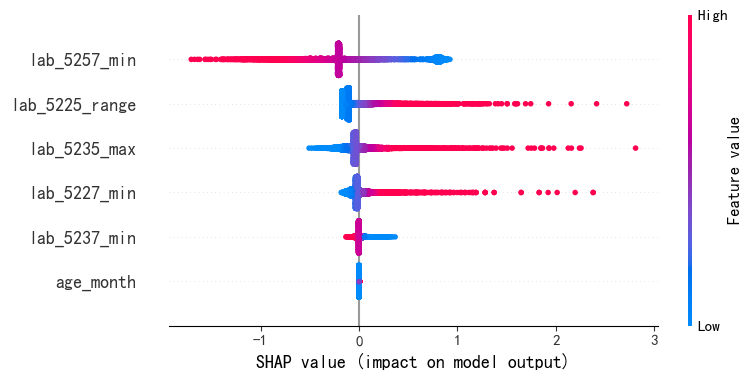

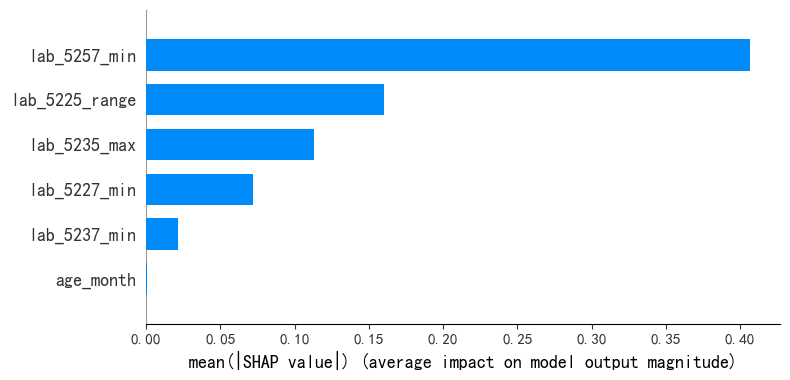

In [20]:
# 1. 绘制 SHAP 蜂群图 (默认摘要图)
# shap.summary_plot()绘制SHAP摘要图，默认为蜂群图
# 参数说明：
# shap_values：计算得到的SHAP值对象
# X_train：原始特征数据，用于显示特征值
# 蜂群图特点：
# - Y轴：按重要性排序的特征
# - X轴：SHAP值（正值增加死亡风险，负值降低死亡风险）
# - 颜色：特征值大小（红色=高值，蓝色=低值）
# - 每个点代表一个样本的一个特征
# 使用方法：shap.summary_plot(shap_values, features_data)
shap.summary_plot(shap_values, X_train)

# 图表解释：
# 蜂群图提供了丰富的模型解释信息：
# 1. 特征重要性：Y轴从上到下按重要性递减排列
# 2. 影响方向：X轴正负值表示对死亡风险的影响方向
# 3. 特征值模式：颜色表示特征值高低
# 4. 数据分布：点的密度反映数据分布情况
# 解读要点：
# - 特征在Y轴的位置越靠上，重要性越高
# - 点分布在X轴右侧表示增加死亡风险
# - 红色点表示高特征值，蓝色点表示低特征值
# - 如果红色点主要在右侧，说明高值增加风险


# 2. 绘制 SHAP 总结条形图
# plot_type="bar"：指定绘制条形图而不是蜂群图
# 条形图特点：
# - 显示每个特征的平均绝对SHAP值
# - 纯粹的特征重要性排序，不考虑方向
# - 更简洁，便于快速识别重要特征
# 使用方法：shap.summary_plot(shap_values, features_data, plot_type="bar")
shap.summary_plot(shap_values, X_train, plot_type="bar")

# 图表解释：
# 条形图展示了特征的重要性排序：
# 1. 条形长度：表示特征的平均影响力（|SHAP值|的均值）
# 2. 排序：从上到下按重要性递减
# 3. 数值：条形末尾显示具体的重要性数值
# 4. 误差线：表示SHAP值的标准差（可选）
# 应用价值：
# - 快速识别最重要的预测因子
# - 为特征选择提供依据
# - 帮助理解模型的主要驱动因素
# - 便于向非技术人员解释模型

### 4.3 SHAP Dependence Plot (依赖图)

**要求：**
使用 `shap.dependence_plot()` 绘制 `lab_5235_max` 这个特征的依赖图。横坐标是该特征的原始值，纵坐标是该特征的SHAP值。

**思考**：这张图告诉你 `lab_5235_max` 的值升高或降低，对死亡风险的预测（SHAP值）有什么样的影响？

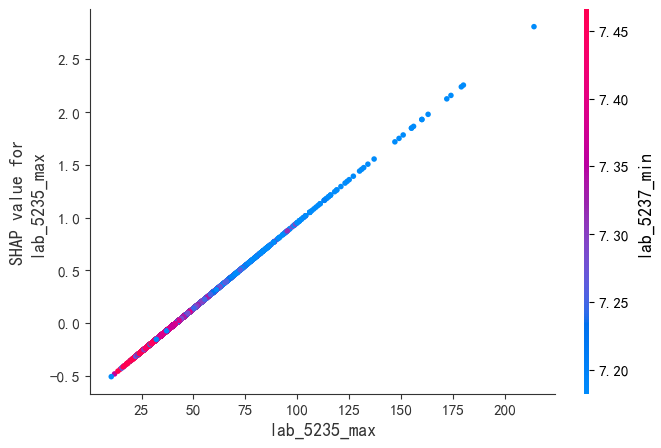

In [21]:
# 绘制SHAP依赖图
# shap.dependence_plot()展示单个特征与SHAP值的关系
# 参数说明：
# 'lab_5235_max'：要分析的特征名称
# shap_values.values：SHAP值数组
# X_train：原始特征数据
# 依赖图特点：
# - X轴：特征的原始值
# - Y轴：该特征的SHAP值
# - 颜色：自动选择最相关的交互特征
# 使用方法：shap.dependence_plot('特征名', shap_values.values, features_data)
shap.dependence_plot('lab_5235_max', shap_values.values, X_train)

# 图表解释：
# 依赖图展示了单个特征如何影响模型预测：
# 1. 主要关系：
#    - X轴：lab_5235_max的原始值
#    - Y轴：该特征的SHAP值（对死亡风险的影响）
#    - 点的颜色：表示另一个相关特征的值（自动选择）
# 
# 2. 解读要点：
#    - 如果点从左到右呈上升趋势：特征值增加会提高死亡风险
#    - 如果点从左到右呈下降趋势：特征值增加会降低死亡风险
#    - 如果点呈水平分布：特征值对风险影响较小
#    - 垂直分散：表示存在交互效应
# 
# 3. 颜色编码：
#    - 不同颜色表示另一个特征的值
#    - 可以发现特征间的交互作用
#    - 相同颜色的点形成模式表示交互效应
# 
# 4. 实际应用：
#    - 理解特征与风险的非线性关系
#    - 识别阈值效应（如某个值以上风险急剧增加）
#    - 发现临床决策的关键指标
#    - 验证医学知识的合理性

### 4.4 SHAP Force Plot (力图) - 解释单个预测

**要求：**
1.  为了在Jupyter中正确显示力图，需要先运行 `shap.initjs()`。
2.  使用 `shap.force_plot()` 来解释**训练集第一个样本** (`X_train.iloc[0]`) 的预测结果。你需要传入解释器的期望值 (`explainer.expected_value`)，该样本的SHAP值 (`shap_values.values[0]`)，以及该样本的原始特征值 (`X_train.iloc[0]`)。

In [22]:
# 1. 初始化JavaScript，用于显示力图
# shap.initjs()初始化JavaScript库，力图需要JavaScript支持
# 在Jupyter notebook中必须先调用此函数才能显示交互式力图
# 使用方法：shap.initjs()
shap.initjs()


# 2. 绘制单个样本的力图
# shap.force_plot()创建力图，解释单个预测
# 参数说明：
# explainer.expected_value：模型的基准预测值（所有特征的平均影响）
# shap_values.values[0]：第一个样本的SHAP值数组
# X_train.iloc[0]：第一个样本的原始特征值
# 
# 力图特点：
# - 基准值：模型的平均预测
# - 红色推力：增加预测概率的特征
# - 蓝色推力：降低预测概率的特征
# - 最终预测：基准值 + 所有特征贡献
# 使用方法：shap.force_plot(base_value, shap_values, features)
shap.force_plot(explainer.expected_value, shap_values.values[6], X_train.iloc[6])

# 图表解释：
# 力图直观展示了单个预测的构成：
# 
# 1. 基准值（Base Value）：
#    - 模型在训练集上的平均预测值
#    - 作为所有预测的起点
# 
# 2. 特征贡献：
#    - 红色条：推高预测值的特征（增加死亡风险）
#    - 蓝色条：拉低预测值的特征（降低死亡风险）
#    - 条形长度：贡献的绝对大小
# 
# 3. 最终预测：
#    - Output显示最终的预测概率
#    - 基准值 + 红色推力 - 蓝色拉力 = 最终预测
# 
# 4. 临床意义：
#    - 可以解释为什么某个患者被预测为高风险
#    - 识别导致高风险的关键因素
#    - 为临床决策提供个性化解释
#    - 帮助医生理解模型的推理过程
# 
# 5. 交互功能：
#    - 鼠标悬停查看特征详情
#    - 可以调整显示的特征数量
#    - 支持导出为图片

---

## 总结

本练习涵盖了数据可视化的多个重要方面：

1. **探索性数据分析可视化**：通过直方图和箱线图了解数据分布和特征关系
2. **模型评估可视化**：使用混淆矩阵和ROC曲线评估分类模型性能
3. **无监督学习可视化**：通过肘部法则图确定最佳聚类数量
4. **模型解释性可视化**：使用SHAP值解释模型预测结果

这些可视化技术是数据科学和机器学习项目中的重要工具，能够帮助我们更好地理解数据、评估模型和解释结果。